# Introduction

Author: Alan Lorenzetti    

Date: 01/23/2025    

This script will take percentage tables of yH2AX foci generated by Laura, plot bar charts and ECDF plots, and perform a Kolmogorov-Smirnov test to compare the distribution of foci between XDP and dSVA-XDP.

## Setting up

In [1]:
# setting up ####
# loading libs
packs = c(
 "tidyverse",
 "ggpubr",
 "ggthemes"
)

lapply(packs, require, character.only = TRUE)

theme_set(theme_pubr())

if(!dir.exists("../_m")){dir.create("../_m")}
setwd("../_m")

Loading required package: tidyverse



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: ggpubr



Loading required package: ggthemes



[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

## Getting started

In [2]:
# Function for analysis
foci_analysis = function(df) {
  
  df = df |>
    as_tibble() |>
    pivot_longer(cols = Control:delSVA.XDP, names_to = "Cell_line", values_to = "pct") |>
    dplyr::filter(Cell_line != "Control") |>
    dplyr::mutate(pct = pct * 100)
  
  df$Number.of.foci = factor(df$Number.of.foci, levels = 1:10)
  
  dfwide = df |>
    mutate(Number.of.foci = as.integer(Number.of.foci)) |>
    mutate(Cell_line = factor(Cell_line, levels = c("XDP", "delSVA.XDP"))) |>
    pivot_wider(names_from = Cell_line, values_from = pct)
  
  ksresults_two = ks.test(x = dfwide$XDP, y = dfwide$delSVA.XDP, alternative = "two.sided", exact = T)
  ksresults_less = ks.test(x = dfwide$XDP, y = dfwide$delSVA.XDP, alternative = "less", exact = T)
  ksresults_greater = ks.test(x = dfwide$XDP, y = dfwide$delSVA.XDP, alternative = "greater", exact = T)
  
  caption_ks = paste0("Kolmogorov-Smirnov test; x = XDP\n", 
                      "p = ", round(ksresults_two$p.value, digits = 3), ", ", ksresults_two$alternative, "\n",
                      "p = ", round(ksresults_less$p.value, digits = 3), ", ", ksresults_less$alternative, "\n",
                      "p = ", round(ksresults_greater$p.value, digits = 3), ", ", ksresults_greater$alternative)
    
  hist_plot = df |>
    mutate(Number.of.foci = as.integer(Number.of.foci)) |>
    mutate(Cell_line = factor(Cell_line, levels = c("XDP", "delSVA.XDP"))) |>
    ggplot(aes(x = Number.of.foci,
               y = pct, fill = Cell_line)) +
    geom_col(position = "dodge", color = "black") +
    geom_smooth(aes(color = Cell_line),
                linewidth = 1,
                method = "loess", se = F) +
    theme_pubr() +
    xlab("Number of foci") +
    ylab("Percentage of cells with yH2AX foci") +
    scale_fill_manual(values = c("delSVA.XDP" = "#666666",
                                 "XDP" = "#F28E2B"),
                      labels = c("delSVA.XDP" = "dSVA-XDP",
                                 "XDP" = "XDP")) +
    scale_color_manual(values = c("delSVA.XDP" = "#666666",
                                  "XDP" = "#F28E2B"),
                       labels = c("delSVA.XDP" = "dSVA-XDP",
                                  "XDP" = "XDP")) +
    scale_x_continuous(breaks = c(1:10)) +
    labs(caption = "10 means 10+")
  
  ecdf_plot = df |>
    mutate(Number.of.foci = as.integer(Number.of.foci)) |>
    mutate(Cell_line = factor(Cell_line, levels = c("XDP", "delSVA.XDP"))) |>
    mutate(total = round(pct*100)) |>
    select(-pct) |>
    group_by(Number.of.foci, Cell_line) |>
    uncount(total) |>
    ungroup() |>
    ggplot(aes(x = Number.of.foci, color = Cell_line)) +
    stat_ecdf() +
    theme_pubr() +
    scale_color_manual(values = c("delSVA.XDP" = "#666666",
                                  "XDP" = "#F28E2B"),
                       labels = c("delSVA.XDP" = "dSVA-XDP",
                                  "XDP" = "XDP")) +
    scale_x_continuous(breaks = c(1:10)) +
    xlab("Number of foci") +
    ylab("ECDF") +
    labs(caption = paste0("10 means 10+\n", caption_ks))
  
  return(list(df = df,
              dfwide = dfwide,
              hist_plot = hist_plot,
              ecdf_plot = ecdf_plot,
              ksresults_two = ksresults_two,
              ksresults_less = ksresults_less,
              ksresults_greater = ksresults_greater))
}

In [3]:
#####################
# All groups     ####
#####################
df = read_csv(file = "all_groups_yh2ax.csv")
res_all = foci_analysis(df = df)

#####################
# Groups 2 and 3 ####
#####################
df = read_csv(file = "groups_2_and_3_yh2ax.csv")
res23 = foci_analysis(df = df)

#####################
# Group 1        ####
#####################
df = read_csv(file = "group1_yh2ax.csv")
res1 = foci_analysis(df = df)

#####################
# Group 2        ####
#####################
df = read_csv(file = "group2_yh2ax.csv")
res2 = foci_analysis(df = df)

#####################
# Group 3        ####
#####################
df = read_csv(file = "group3_yh2ax.csv")
res3 = foci_analysis(df = df)

Rows: 10 Columns: 4


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): Number.of.foci, Control, XDP, delSVA.XDP



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 10 Columns: 4


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): Number.of.foci, Control, XDP, delSVA.XDP



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 10 Columns: 4


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): Number.of.foci, Control, XDP, delSVA.XDP



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 10 Columns: 4


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): Number.of.foci, Control, XDP, delSVA.XDP



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 10 Columns: 4


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): Number.of.foci, Control, XDP, delSVA.XDP



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
# arranging plots
arranged_plot = ggarrange(plotlist = list(res_all$hist_plot, res_all$ecdf_plot,
                                          res23$hist_plot, res23$ecdf_plot,
                                          res1$hist_plot, res1$ecdf_plot,
                                          res2$hist_plot, res2$ecdf_plot,
                                          res3$hist_plot, res3$ecdf_plot),
                          ncol = 2, nrow = 5,
                          common.legend = T, align = "hv",
                          labels = c("All groups", "",
                                     "Groups 2 and 3", "",
                                     "Group 1", "",
                                     "Group 2", "",
                                     "Group 3", ""))

ggsave(filename = "all_histograms.pdf", plot = arranged_plot, width = 8.5, height = 22)

`geom_smooth()` using formula = 'y ~ x'


`geom_smooth()` using formula = 'y ~ x'


`geom_smooth()` using formula = 'y ~ x'


`geom_smooth()` using formula = 'y ~ x'


`geom_smooth()` using formula = 'y ~ x'


`geom_smooth()` using formula = 'y ~ x'


In [5]:
options(repr.plot.width = 8.5, repr.plot.height = 22)
# arranged_plot

`geom_smooth()` using formula = 'y ~ x'


`geom_smooth()` using formula = 'y ~ x'


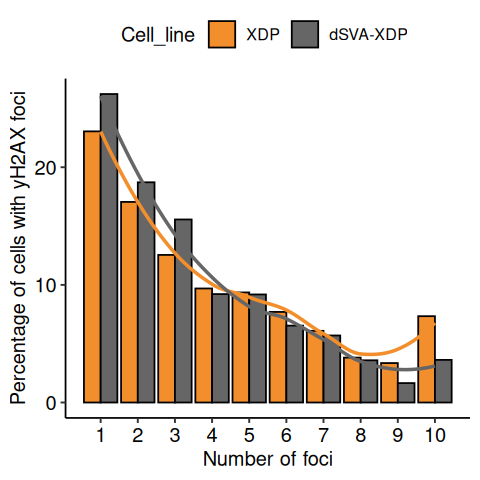

In [6]:
options(repr.plot.width = 4, repr.plot.height = 4)
res32_to_save = res23$hist + labs(caption = NULL)
ggsave(filename = "groups23_yH2AX_pct_num_foci.pdf",
       plot = res32_to_save,
       width = 4, height = 4)
res32_to_save

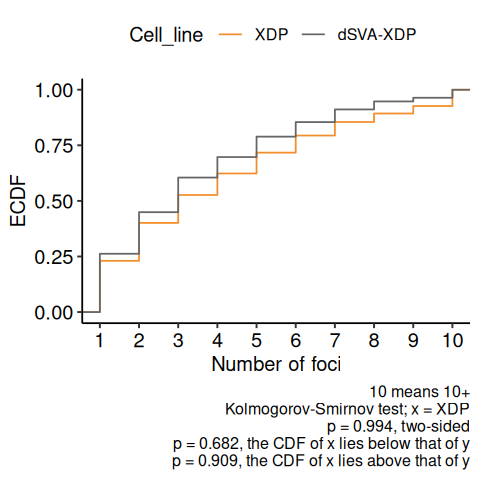

In [7]:
options(repr.plot.width = 4, repr.plot.height = 4)
res23$ecdf_plot

## Session Info

In [8]:
sessionInfo()

R version 4.4.2 (2024-10-31)
Platform: x86_64-pc-linux-gnu
Running under: Arch Linux

Matrix products: default
BLAS:   /usr/lib/libblas.so.3.12.0 
LAPACK: /usr/lib/liblapack.so.3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: EST
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ggthemes_5.1.0  ggpubr_0.6.0    lubridate_1.9.4 forcats_1.0.0  
 [5] stringr_1.5.1   dplyr_1.1.4     purrr_1.0.2     readr_2.1.5    
 [9] tidyr_1.3.1     tibble_3.2.1    ggplot2_3.5.1   tidyverse_2.0.0

loaded via a namespace (and not attached):
 [1] gtable_0.3.6      rstatix_